In [ ]:
0import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'A':[1,2,3],
    'B':[4,5,6],
    'C':[7,8,9],
    'D':[1,3,5],
    'E':[5,3,6],
    'F':[7,4,3],
})

In [ ]:
print(df)

   A  B  C  D  E  F
0  1  4  7  1  5  7
1  2  5  8  3  3  4
2  3  6  9  5  6  3


In [ ]:
print(df.iloc[::-1])

   A  B  C  D  E  F
2  3  6  9  5  6  3
1  2  5  8  3  3  4
0  1  4  7  1  5  7


In [ ]:
df.iloc[:,0]

0    1
1    2
2    3
Name: A, dtype: int64

In [ ]:
df.iloc[:,-1]

0    7
1    4
2    3
Name: F, dtype: int64

**Head Brain**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/headbrain1.csv')
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Head Size(cm^3)      237 non-null    int64
 1   Brain Weight(grams)  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.isnull().sum()

Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [ ]:
df.shape

(237, 2)

In [ ]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [ ]:
X.shape

(237,)

In [ ]:
Y.shape

(237,)

In [ ]:
#Method 1 : Manual coding

mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)
num = 0
denom = 0

for i in range(n):
  num += (X[i]-mean_x) * (Y[i]-mean_y)
  denom += (X[i]-mean_x)**2

m = num/denom
c = mean_y - (m*mean_x)

# we cslculate m and c, Y = mx+c

print("M -> ",m)
print("C -> ",c)

M ->  0.26342933948939945
C ->  325.57342104944223


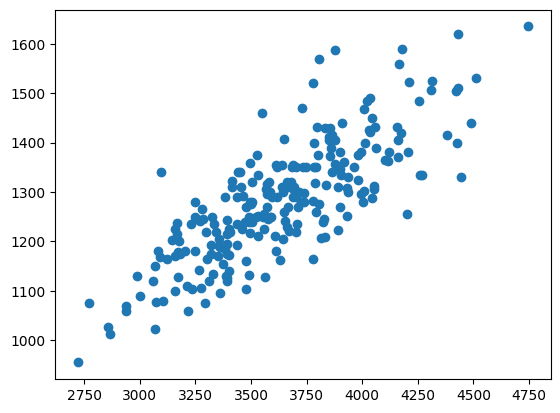

In [ ]:
plt.scatter(X,Y)

In [ ]:
min_x = np.min(X)-100
max_x = np.max(X)+100

In [ ]:
x = np.linspace(min_x,max_x,1000)

In [ ]:
y = m*x+c

Text(0, 0.5, 'Brain Weight in grams')

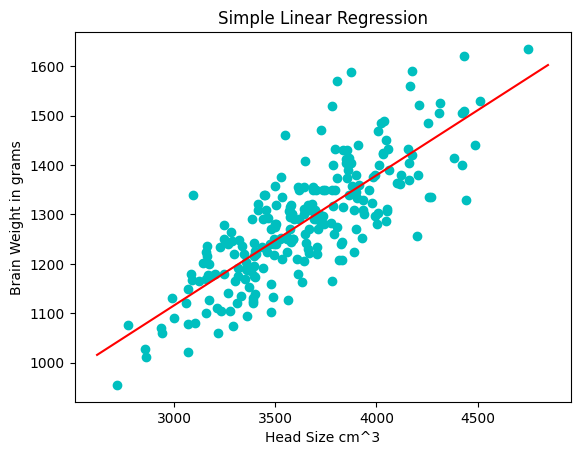

In [ ]:
plt.scatter(X,Y,color='c')
plt.plot(x,y,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Head Size cm^3')
plt.ylabel('Brain Weight in grams')

In [ ]:
sum_pred = 0
sum_act = 0

for i in range(n):
  y_pred = (m * X[i]+c)
  sum_pred += (Y[i]-y_pred)**2
  sum_act += (Y[i]-mean_y)**2

r2 = 1 - (sum_pred/sum_act)
print(r2)

0.6393117199570003


In [ ]:
def predect(x):
  y = m*x+c
  print(y)

In [ ]:
predect(4177)

1425.9177720966638


### **Automatic**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = X.reshape((n,1))

In [ ]:
X.shape

(237, 1)

In [ ]:
y.shape

(1000,)

In [ ]:
lg = LinearRegression()

In [ ]:
lg.fit(X,Y)

LinearRegression()

In [ ]:
y_pred = lg.predict(X)

In [ ]:
mse = mean_squared_error(Y,y_pred)

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
r2_score = lg.score(X,Y)

In [ ]:
print(rmse)
print(r2_score)

72.1206213783709
0.639311719957


In [ ]:
lg.predict([[4177]])

array([1425.9177721])

In [ ]:
lg.intercept_

325.5734210494426